## Load the module
If you added the folder in which `jpkfile.py` is to you site-packages, you should be able to import the module.

In [1]:
import jpkfile

## Create a JPKFile object

In [2]:
jpk = jpkfile.JPKFile("../examples/force-save-2016.06.15-13.17.08.jpk-force")

## Structure of JPKFile objects

* Data is separated in segments in jpk archives. Thus, it is separated in JPKFile objects as well. The member JPKFile.segments is a list of JPKSegment objects.

In [3]:
jpk.segments

{0: <jpkfile.JPKSegment instance at 0x7fc324a05ef0>,
 1: <jpkfile.JPKSegment instance at 0x7fc32c4ef320>,
 2: <jpkfile.JPKSegment instance at 0x7fc300c02a28>,
 3: <jpkfile.JPKSegment instance at 0x7fc32c4f1200>}

* To get some basic information on the jpk archive behind the JPKFile object, you can use the JPKFile.get_info function. Note that 'segments' is currently the only working keyword here ...

In [4]:
print(jpk.get_info('segments'))

SEGMENT	TYPE	NUM POINTS	DURATION
-------	----	----------	--------
0	extend	60000		10.0
1	pause	30000		5.0
2	retract	60000		10.0
3	pause	2		5.0



## Data of segments
The JPKSegment objects contain some information and parameters as well. Additionaly, they contain the segment's data. 

JPKSegment.data is a dictionary, where keys are different channels and values are data arrays and parameters on how to convert the raw data to physical values.  
To figure out what the names of valid channels are, print JPKSegment.data.keys().

In [5]:
s0 = jpk.segments[0]
print(s0.data.keys())

['hDeflection', 'vDeflection', 'height', 'strainGaugeHeight', 't', 'error']


## Extract data converted to physical values
Use the function get_array() to get the physical data of channels.  
Let's say you want data of channel 'height' and 'vDeflection' (which makes sense for the example file, it looks like all the other channels are not relevant, since there are no parameters on conversion to physical values defined; jpk appears to always store all channels that could be used for the method of recording) you need to provide these channel names as first parameter in a list.

In [6]:
s0_data, s0_units = s0.get_array(['height','vDeflection'])

In [7]:
print(s0_data)

[[(4.882270801632857e-05, -2.2291090247982416e-09)]
 [(4.882172935038292e-05, -2.227681939448722e-09)]
 [(4.882075068443725e-05, -2.2229249882836574e-09)]
 ..., 
 [(1.752986440377226e-05, -1.7957507736608136e-09)]
 [(1.752986440377226e-05, -1.7971778590103334e-09)]
 [(1.7528885737826602e-05, -1.7819556152821252e-09)]]


The function returns a tuple with a labeled numpy array as first item, a dictionary specifying the physical units for each channel.

In [8]:
print(s0_units)

{'vDeflection': 'N', 'height': 'm'}


## Data of all segments
You can also retrieve the data of all segments in a similar way, by using JPKFile's get_array function.

In [10]:
data,units = jpk.get_array(['height','vDeflection'])

## But for plotting ...
it is probably more useful to extract them separately, to be able to plot them separately.

In [16]:
s1_data = jpk.segments[1].get_array(['height','vDeflection'])[0]
s2_data = jpk.segments[2].get_array(['height','vDeflection'])[0]
# I actually don't know what the last segment is, it contains only 2 data points

## Plot the data

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


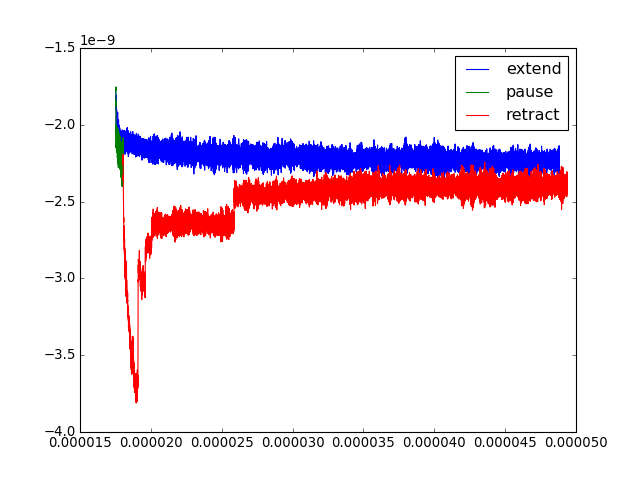

In [19]:
f,ax = plt.subplots(1,1)
ax.plot(s0_data['height'],s0_data['vDeflection'], label = jpk.segments[0].get_info('type'))
ax.plot(s1_data['height'],s1_data['vDeflection'], label = jpk.segments[1].get_info('type'))
ax.plot(s2_data['height'],s2_data['vDeflection'], label = jpk.segments[2].get_info('type'))
ax.legend()